In [7]:
import geopandas as gpd
import pandas as pd
import seaborn as sns
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

domain = 'WY'

In [11]:
#load snotel file 
assimPath = '/nfs/attic/dfh/Aragon2/CSOassim/'+domain+'/'
# Figure path
figpath = '/nfs/attic/dfh/Aragon2/CSOfigs/'+domain+'/'

stn_proj = 'epsg:4326'                                     
gdf = gpd.read_file(assimPath+"SNOTEL_attributes.json", driver="GeoJSON", crs=stn_proj)
gdf.head()

,code,longitude,latitude,name,elevation_m,easting,northing,x,y,dem_elev,slope,aspect,lc,tc,geometry
0,314_WY_SNTL,-110.445442,43.940189,Base Camp,2151.887939453125,544505.845453,4.865379e+06,544505.845453,4.865379e+06,2145,14.826075,2.0,1.0,12,POINT (-110.44544 43.94019)
1,347_MT_SNTL,-111.128029,44.508320,Black Bear,2490.216064453125,489823.440274,4.928341e+06,489823.440274,4.928341e+06,2493,1.510381,3.0,1.0,2,POINT (-111.12803 44.50832)
2,350_WY_SNTL,-109.793327,44.376671,Blackwater,2980.944091796875,596129.923439,4.914418e+06,596129.923439,4.914418e+06,3006,18.073633,1.0,1.0,15,POINT (-109.79333 44.37667)
3,353_WY_SNTL,-110.609734,42.964001,Blind Bull Sum,2636.52001953125,531828.554679,4.756891e+06,531828.554679,4.756891e+06,2716,0.637377,0.0,1.0,3,POINT (-110.60973 42.96400)
4,419_WY_SNTL,-110.814819,42.645901,Cottonwood Creek,2337.81591796875,515180.157295,4.721511e+06,515180.157295,4.721511e+06,2351,14.629807,6.0,1.0,18,POINT (-110.81482 42.64590)


In [12]:
# load previously made file 
csogdf = gpd.read_file(assimPath+"CSO_attributes.json", driver="GeoJSON", crs=stn_proj)

csogdf.head()

,index,id,author,depth,source,timestamp,elevation,x,y,dem_elev,slope,aspect,lc,tc,M,D,LON,LAT,H,geometry
0,124,D3gyiOmE,Katie O’Connell,10.00,MountainHub,2019-04-25T02:25:30,2131.137695,532422.643976,4.835319e+06,2128,8.500000,7.0,6.0,8,4,25,-110.597819,43.670172,100.0,POINT (-110.59782 43.67017)
1,125,SEJG7WBM,Katie O’Connell,72.00,MountainHub,2019-04-25T02:24:32,2127.995361,532364.144681,4.835374e+06,2124,6.775415,7.0,6.0,6,4,25,-110.598541,43.670671,720.0,POINT (-110.59854 43.67067)
2,126,Vn9QgQA7,Leanne,27.94,MountainHub,2019-04-24T15:56:24,2146.224609,532764.130403,4.835319e+06,2147,7.386643,7.0,2.0,7,4,24,-110.593583,43.670154,279.4,POINT (-110.59358 43.67015)
3,127,xlFXLIST,Leanne,25.40,MountainHub,2019-04-24T15:53:28,2156.758057,532954.088693,4.835360e+06,2154,11.259718,7.0,1.0,9,4,24,-110.591224,43.670517,254.0,POINT (-110.59122 43.67052)
4,128,4EMEMrPA,Colton Lewer,60.00,MountainHub,2019-04-24T15:53:19,2188.988770,532362.586657,4.835038e+06,2178,17.787811,7.0,1.0,15,4,24,-110.598580,43.667641,600.0,POINT (-110.59858 43.66764)


In [4]:
csogdf.columns

Index(['index', 'id', 'author', 'depth', 'source', 'timestamp', 'elevation',
       'x', 'y', 'dem_elev', 'slope', 'aspect', 'lc', 'tc', 'M', 'D', 'LON',
       'LAT', 'H', 'geometry'],
      dtype='object')

# aspect

In [5]:
# aspect choices: 'N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW','flat'
aspect_dict = {'N':0, 'NE':1, 'E':2, 'SE':3, 'S':4, 'SW':5, 'W':6, 'NW':7,'flat':8}


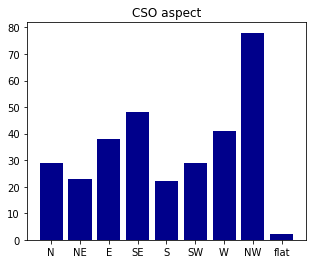

In [6]:
labels, counts = np.unique(csogdf.aspect, return_counts=True)
lab = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW','flat']
plt.figure(figsize=[5,4])
plt.bar(lab, counts, align='center',color = 'darkblue')
plt.gca().set_xticks(labels)
plt.title('CSO aspect')
plt.show()

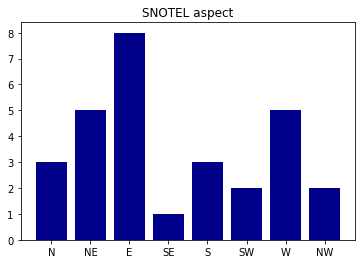

In [11]:
labels, counts = np.unique(gdf.aspect, return_counts=True)
lab = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
plt.bar(lab, counts, align='center',color = 'darkblue')
plt.gca().set_xticks(labels)
plt.title('SNOTEL aspect')
plt.show()

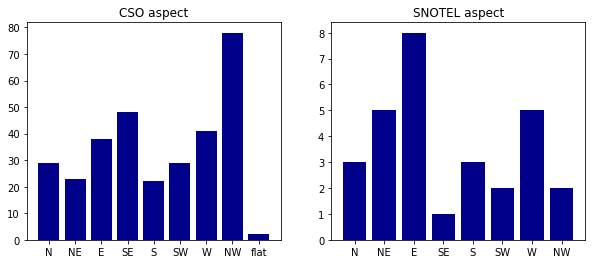

In [32]:
labels, counts = np.unique(df.aspect, return_counts=True)
lab = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW','flat']
fig,ax = plt.subplots(1,2,figsize=[10,4])
ax[0].bar(lab, counts, align='center',color = 'darkblue')
ax[0].set_xticks(labels)
ax[0].set_title('CSO aspect')
labels, counts = np.unique(gdf.aspect, return_counts=True)
lab = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
ax[1].bar(lab, counts, align='center',color = 'darkblue')
ax[1].set_xticks(labels)
ax[1].set_title('SNOTEL aspect')
plt.show()

In [33]:
path = figpath+'wy19_assim_aspect.pdf'
fig.savefig(path, format='pdf', dpi=300)

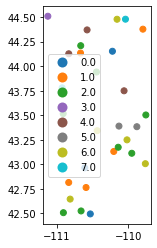

In [16]:


gdf.plot(column='aspect', categorical=True,legend=True)


In [ ]:
gdf.plot(ax=ax, column='bias', cmap = 'BrBG',legend=True, transform=ccrs.PlateCarree(),vmin=-2000,vmax=2000)


# month

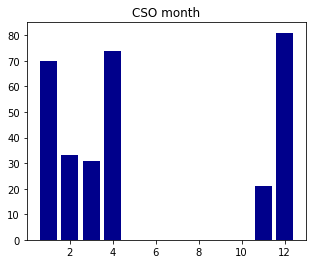

In [42]:
labels, counts = np.unique(df.M, return_counts=True)
fig, ax = plt.subplots(1,figsize=[5,4])
ax.bar(labels, counts, align='center',color = 'darkblue')
ax.set_title('CSO month')
plt.show()

In [43]:
path = figpath+'wy19_assim_CSOmonth.pdf'
fig.savefig(path, format='pdf', dpi=300)

In [18]:
lc_dict ={
    1:'coniferous forest',
    2:'deciduous forest',
    3:'mixed forest',       
    4:'scattered short-conifer',
    5:'clearcut conifer',   
    6:'mesic upland shrub',
    7:'xeric upland shrub',
    8:'playa shrubland',   
    9:'shrub wetland/riparian',
    10:'erect shrub tundra',
    11:'low shrub tundra',
    12:'grassland rangeland',
    13:'subalpine meadow',
    14:'tundra (non-tussock)',
    15:'tundra (tussock)',
    16:'prostrate shrub tundra',
    17:'arctic gram. wetland',
    18:'bare',
    19:'water/possibly frozen',
    20:'permanent snow/glacier',
    21:'residential/urban',
    22:'tall crops',
    23:'short crops',
    24:'open water'}

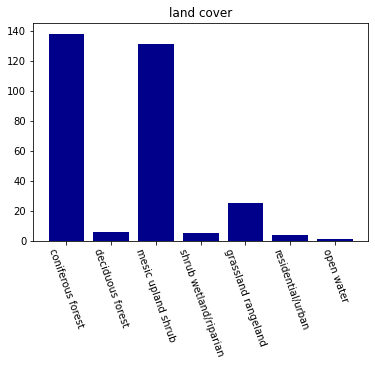

In [13]:
labels, counts = np.unique(df.lc, return_counts=True)
lab =[]
for i in range(len(labels)):
    lab.append(lc_dict[labels[i]])
plt.bar(lab, counts, align='center',color = 'darkblue')
plt.xticks(rotation=-70)
plt.title('CSO land cover')
#plt.gca().set_xticks(labels)
plt.show()

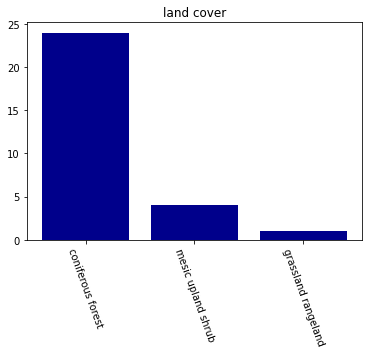

In [14]:
labels, counts = np.unique(gdf.lc, return_counts=True)
lab =[]
for i in range(len(labels)):
    lab.append(lc_dict[labels[i]])
plt.bar(lab, counts, align='center',color = 'darkblue')
plt.xticks(rotation=-70)
plt.title('SNOTEL land cover')
#plt.gca().set_xticks(labels)
plt.show()

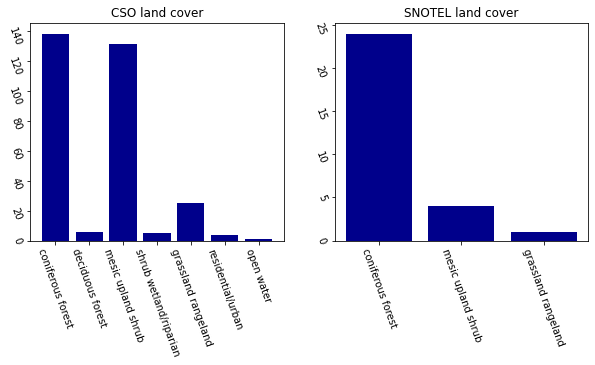

In [37]:
labels, counts = np.unique(df.lc, return_counts=True)
lab =[]
for i in range(len(labels)):
    lab.append(lc_dict[labels[i]])

fig,ax = plt.subplots(1,2,figsize=[10,4])
ax[0].bar(lab, counts, align='center',color = 'darkblue')
ax[0].tick_params(labelrotation=-70)
ax[0].set_title('CSO land cover')

labels, counts = np.unique(gdf.lc, return_counts=True)
lab =[]
for i in range(len(labels)):
    lab.append(lc_dict[labels[i]])
ax[1].bar(lab, counts, align='center',color = 'darkblue')
ax[1].tick_params(labelrotation=-70)
ax[1].set_title('SNOTEL land cover')
plt.show()

In [38]:
path = figpath+'wy19_assim_lc.pdf'
fig.savefig(path, format='pdf', dpi=300)

Text(0.5, 1.0, 'CSO elevation')

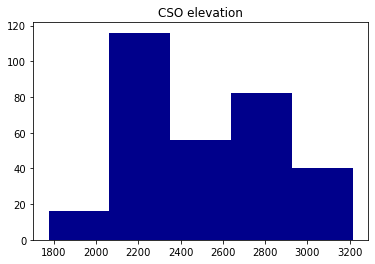

In [38]:
plt.hist(df.dem_elev,bins=4, range=(df.dem_elev.min(),df.dem_elev.max()),color = 'darkblue')
plt.title('CSO elevation')

Text(0.5, 1.0, 'SNOTEL elevation')

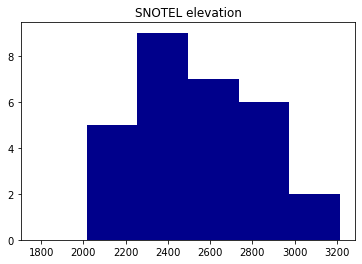

In [36]:
plt.hist(gdf.dem_elev,bins=6, range=(df.dem_elev.min(),df.dem_elev.max()), color = 'darkblue')
plt.title('SNOTEL elevation')

In [19]:
min(df.dem_elev), min(gdf.dem_elev)

(1774, 2069)

In [33]:
np.histogram_bin_edges(gdf.dem_elev,bins=4, range=(df.dem_elev.min(),df.dem_elev.max()))

array([1774. , 2062.4, 2350.8, 2639.2, 2927.6, 3216. ])

In [34]:
np.histogram_bin_edges(df.dem_elev,bins=4, range=(df.dem_elev.min(),df.dem_elev.max()))

array([1774. , 2062.4, 2350.8, 2639.2, 2927.6, 3216. ])

Text(0.5, 1.0, 'SNOTEL elevation')

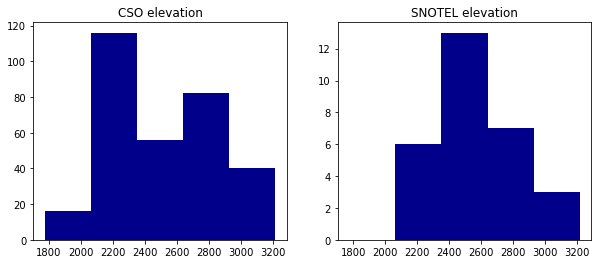

In [12]:
fig,ax = plt.subplots(1,2,figsize=[10,4])
ax[0].hist(df.dem_elev,bins=5, range=(df.dem_elev.min(),df.dem_elev.max()),color = 'darkblue')
ax[0].set_title('CSO elevation')
ax[1].hist(gdf.dem_elev,bins=5, range=(df.dem_elev.min(),df.dem_elev.max()), color = 'darkblue')
ax[1].set_title('SNOTEL elevation')

In [40]:
path = figpath+'wy19_assim_elev.pdf'
fig.savefig(path, format='pdf', dpi=300)

Text(0.5, 1.0, 'SNOTEL slope')

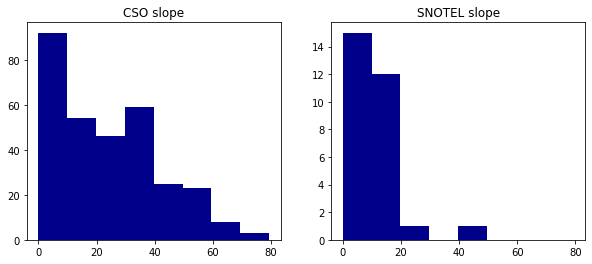

In [8]:
fig,ax = plt.subplots(1,2,figsize=[10,4])
ax[0].hist(df.slope,bins=8, range=(df.slope.min(),df.slope.max()),color = 'darkblue')
ax[0].set_title('CSO slope')
ax[1].hist(gdf.slope,bins=8, range=(df.slope.min(),df.slope.max()), color = 'darkblue')
ax[1].set_title('SNOTEL slope')

## terrain complexity

In [ ]:
# terrain complexity -> for each dem pixel calculate the standard deviation of the surrounding pixels 

Text(0.5, 1.0, 'CSOL terrain complexity')

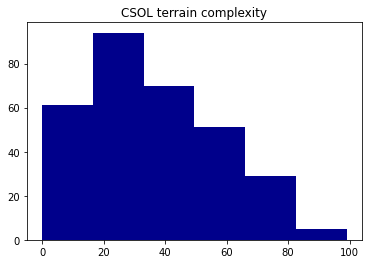

In [15]:
plt.hist(csogdf.tc,bins=6, range=(csogdf.tc.min(),csogdf.tc.max()), color = 'darkblue')
plt.title('CSOL terrain complexity')

Text(0.5, 1.0, 'SNOTEL terrain complexity')

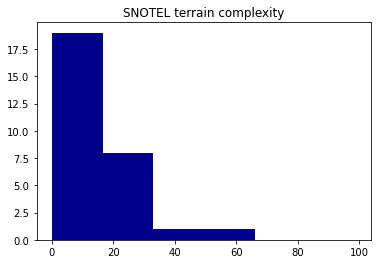

In [16]:
plt.hist(gdf.tc,bins=6, range=(csogdf.tc.min(),csogdf.tc.max()), color = 'darkblue')
plt.title('SNOTEL terrain complexity')

Text(0.5, 1.0, 'SNOTEL terrain complexity')

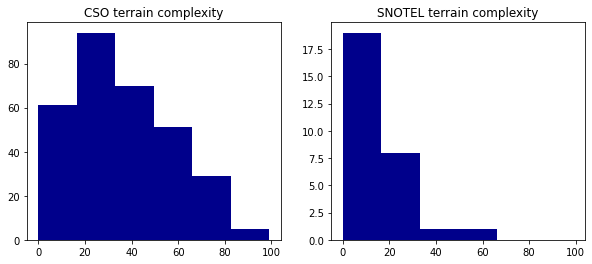

In [17]:
#sampling window of 5
fig,ax = plt.subplots(1,2,figsize=[10,4])
ax[0].hist(csogdf.tc,bins=6, range=(csogdf.tc.min(),csogdf.tc.max()), color = 'darkblue')
ax[0].set_title('CSO terrain complexity')
ax[1].hist(gdf.tc,bins=6, range=(csogdf.tc.min(),csogdf.tc.max()), color = 'darkblue')
ax[1].set_title('SNOTEL terrain complexity')

Text(0.5, 1.0, 'SNOTEL terrain complexity')

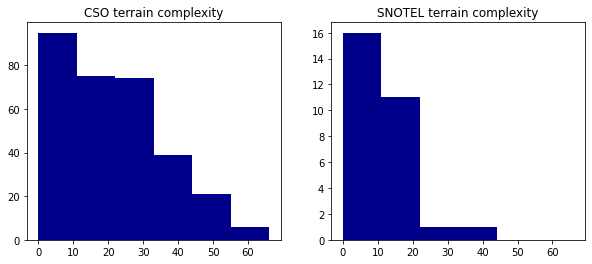

In [17]:
#sampling window of 3
fig,ax = plt.subplots(1,2,figsize=[10,4])
ax[0].hist(csogdf.tc,bins=6, range=(csogdf.tc.min(),csogdf.tc.max()), color = 'darkblue')
ax[0].set_title('CSO terrain complexity')
ax[1].hist(gdf.tc,bins=6, range=(csogdf.tc.min(),csogdf.tc.max()), color = 'darkblue')
ax[1].set_title('SNOTEL terrain complexity')

In [18]:
path = figpath+'wy19_assim_tc.pdf'
fig.savefig(path, format='pdf', dpi=300)